In [1]:
# Importing all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calmap
import plotly.express as px

plt.style.use('ggplot')

In [2]:
# Loading dataframe
df = pd.read_csv("C:\\Users\\iamsh\\Downloads\\Flight Delay Dataset\\Flight Delay Dataset.csv")
df.head()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,UNIQUE_CARRIER,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,DEST,DEST_CITY_NAME,DEST_STATE_ABR,DEP_TIME,ARR_TIME,ARR_DELAY,AIR_TIME,DISTANCE,DISTANCE_GROUP
0,2017,3,7,11,2,7/11/2017,DL,LIT,"Little Rock, AR",AR,ATL,"Atlanta, GA",GA,538,757,-11.0,64,453,2
1,2018,1,3,14,3,3/14/2018,DL,BOS,"Boston, MA",MA,ATL,"Atlanta, GA",GA,1829,2108,-23.0,127,946,4
2,2017,4,11,12,7,11/12/2017,WN,ATL,"Atlanta, GA",GA,DAL,"Dallas, TX",TX,1345,1451,-9.0,106,721,3
3,2017,3,8,22,2,8/22/2017,EV,ATL,"Atlanta, GA",GA,HPN,"White Plains, NY",NY,1158,1408,-21.0,113,780,4
4,2018,1,3,2,5,3/2/2018,DL,MSY,"New Orleans, LA",LA,ATL,"Atlanta, GA",GA,522,737,-19.0,59,425,2


In [ ]:
#We see only one feature having some missing values 
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 147918 entries, 0 to 148051
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   QUARTER           147918 non-null  int64         
 1   MONTH             147918 non-null  int64         
 2   DAY_OF_MONTH      147918 non-null  int64         
 3   DAY_OF_WEEK       147918 non-null  int64         
 4   FL_DATE           147918 non-null  datetime64[ns]
 5   UNIQUE_CARRIER    147918 non-null  object        
 6   ORIGIN            147918 non-null  object        
 7   ORIGIN_CITY_NAME  147918 non-null  object        
 8   ORIGIN_STATE_ABR  147918 non-null  object        
 9   DEST              147918 non-null  object        
 10  DEST_CITY_NAME    147918 non-null  object        
 11  DEST_STATE_ABR    147918 non-null  object        
 12  DEP_TIME          147918 non-null  int64         
 13  ARR_TIME          147918 non-null  int64         
 14  ARR_DELAY

In [4]:
df.shape

(148052, 19)

In [5]:
df.describe(include='object').T

,count,unique,top,freq
FL_DATE,148052,365,4/23/2018,520
UNIQUE_CARRIER,148052,16,DL,95931
ORIGIN,148052,167,ATL,72561
ORIGIN_CITY_NAME,148052,162,"Atlanta, GA",72561
ORIGIN_STATE_ABR,148052,50,GA,75681
DEST,148052,166,ATL,72730
DEST_CITY_NAME,148052,161,"Atlanta, GA",72730
DEST_STATE_ABR,148052,50,GA,75802


#### Defining Target Variable

In [ ]:
# Creating a flag variable (label) using ARR_DELAY variable
df['delay_flag'] = df['ARR_DELAY'].apply(lambda x: 1 if x >0 else 0)

#### Data Cleaning

In [7]:
df.dtypes

YEAR                  int64
QUARTER               int64
MONTH                 int64
DAY_OF_MONTH          int64
DAY_OF_WEEK           int64
FL_DATE              object
UNIQUE_CARRIER       object
ORIGIN               object
ORIGIN_CITY_NAME     object
ORIGIN_STATE_ABR     object
DEST                 object
DEST_CITY_NAME       object
DEST_STATE_ABR       object
DEP_TIME              int64
ARR_TIME              int64
ARR_DELAY           float64
AIR_TIME              int64
DISTANCE              int64
DISTANCE_GROUP        int64
delay_flag            int64
dtype: object

In [8]:
# Converting it to date time format
df['FL_DATE'] = pd.to_datetime(df['FL_DATE'])
df['DISTANCE_GROUP'] = df['DISTANCE_GROUP'].astype('category')

In [9]:
# Checking for Null values
df.isnull().sum().sort_values(ascending=False)

ARR_DELAY           67
YEAR                 0
QUARTER              0
DISTANCE_GROUP       0
DISTANCE             0
AIR_TIME             0
ARR_TIME             0
DEP_TIME             0
DEST_STATE_ABR       0
DEST_CITY_NAME       0
DEST                 0
ORIGIN_STATE_ABR     0
ORIGIN_CITY_NAME     0
ORIGIN               0
UNIQUE_CARRIER       0
FL_DATE              0
DAY_OF_WEEK          0
DAY_OF_MONTH         0
MONTH                0
delay_flag           0
dtype: int64

In [10]:
df = df.dropna()

In [11]:
df.shape

(147985, 20)

In [12]:
# Checking for duplicate records
df.duplicated().sum()

0

In [13]:
# Filtering for unrealistic and impossible values
df = df[(df['DEP_TIME'] >= 0) & (df['DEP_TIME'] <= 2359)]
df = df[(df['ARR_TIME'] >= 0) & (df['ARR_TIME'] <= 2359)]
df = df[(df['DISTANCE'] > 0)]
df = df.drop(columns=['YEAR'])

df.shape

(147918, 19)

#### TASK A: Exploratory Data Analysis
1. Distribution of Target Variable to see for class imbalances

In [73]:
df.delay_flag.value_counts()

delay_flag
0    103240
1     44678
Name: count, dtype: int64

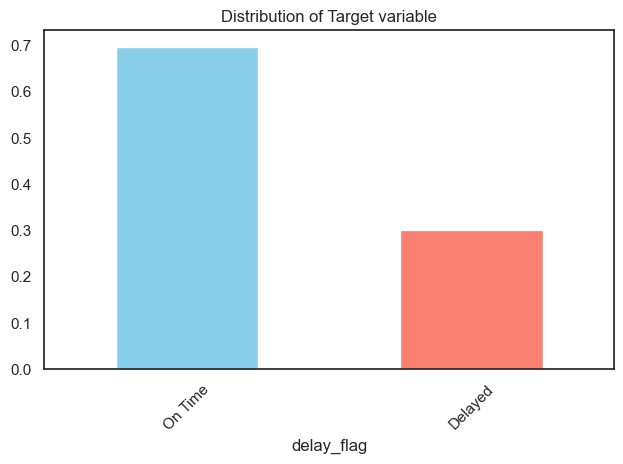

In [74]:
df['delay_flag'].value_counts(normalize=True).plot(kind='bar', color=['skyblue', 'salmon'])
plt.title("Distribution of Target variable")
plt.xticks(ticks=[0, 1], labels=['On Time', 'Delayed'], rotation=45)
plt.grid(False) 
plt.tight_layout()

# Analysis: There is a noticeable class imbalance: 70:30 which is common in real-world data. This information will also help us in model building. 
#It shows that for evaluation, we should focuss on precision, recall and AUC too and not just accuracy.

2.Analyzing Visualizin the effect of temporal features on flight delays

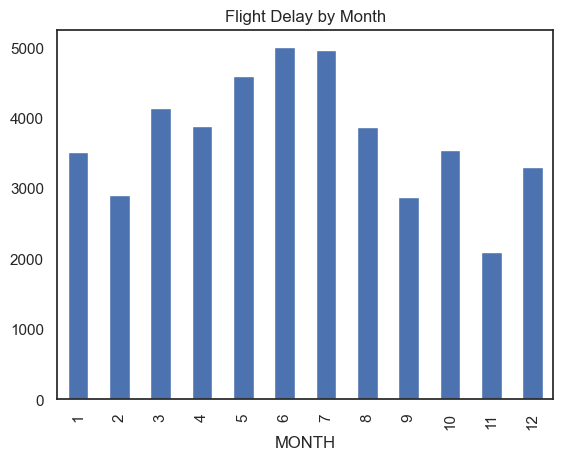

In [75]:
# a)Monthly flight delays
df.groupby('MONTH')['delay_flag'].sum().plot(kind='bar', title='Flight Delay by Month')
plt.grid(False)

#Analysis: Peak flight delays are in the month of June(6) and July(7) having ~5000 delays.
#These are peak summer travel months which have heavier passenger traffic and potential weather disruptions like thunderstorms which are common in US. It might have contributed to the delays


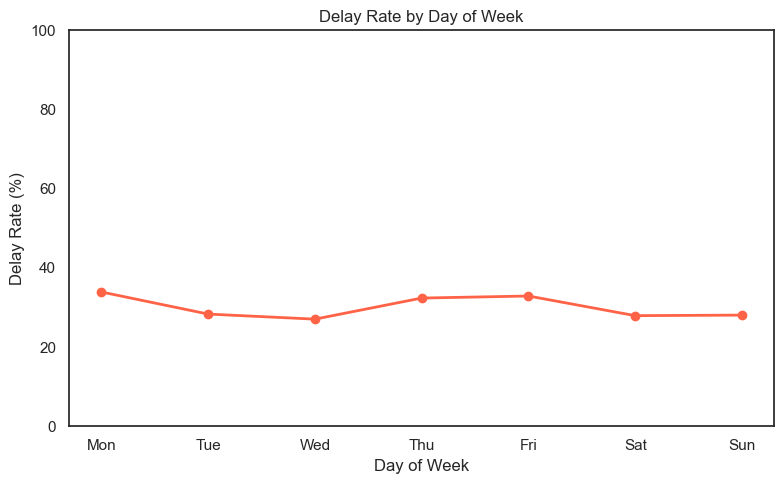

In [76]:
# b) Week day analyis for flight delays
delay_rate = df.groupby('DAY_OF_WEEK')['delay_flag'].mean() * 100

# Map numeric days to weekday names (optional for readability)
delay_rate.index = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

# Plot line chart
plt.figure(figsize=(8, 5))
plt.plot(delay_rate.index, delay_rate.values, marker='o', linestyle='-', color='tomato', linewidth=2)

plt.title('Delay Rate by Day of Week')
plt.ylabel('Delay Rate (%)')
plt.xlabel('Day of Week')
plt.ylim(0, 100)
plt.tight_layout()
plt.grid(False)
plt.show()

#Analysis: It highlights the flight delay trends. Flights are more delay-prone on Modays and Fridays. Wednesdays and Sundays have the lowest delay rates(~27% to 30%).


3. Airport location feature analysis

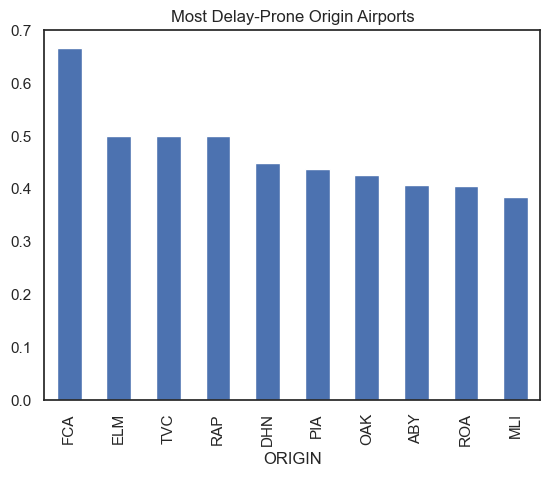

In [77]:
# a)Delay-prone airports
df.groupby('ORIGIN')['delay_flag'].mean().sort_values(ascending=False).head(10).plot(kind='bar', title='Most Delay-Prone Origin Airports')
plt.grid(False) 

#Analysis: This graph shows the top 10 origin airports which have the highest delay rates based on the number of flights they receive. 
# The highest delay rates are at FCA(Glacier Park),a small regional airport, close to 70% ;followed by ELM, TVC, RAP showing delay rates as high as 50%.


C:\Users\iamsh\AppData\Local\Temp\ipykernel_30828\143488261.py:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




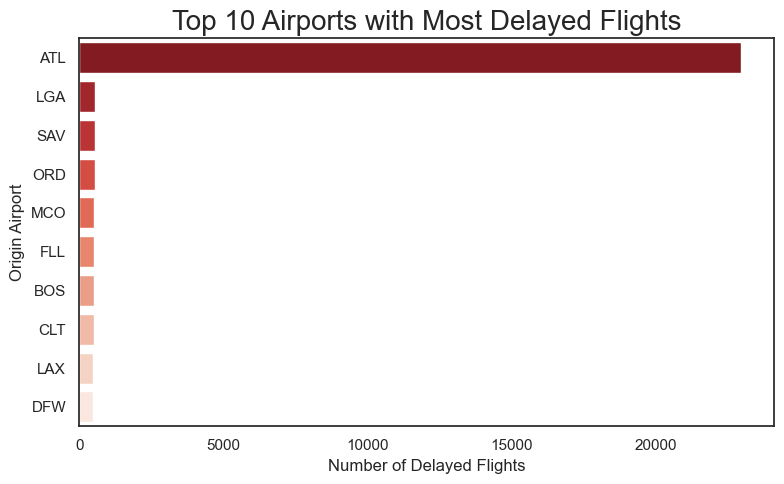

In [78]:
# b) Airports with maximum absolute number of delays

# preparing the data for analysis
delayed_flights = df[df['delay_flag'] == 1]
delayed_counts = delayed_flights.groupby('ORIGIN').size().sort_values(ascending=False).head(10).reset_index(name='num_delays')
plt.figure(figsize=(8, 5))
sns.barplot(data=delayed_counts, x='num_delays', y='ORIGIN', palette='Reds_r')
# plotting the prepared data
plt.title('Top 10 Airports with Most Delayed Flights', fontsize=20)
plt.xlabel('Number of Delayed Flights')
plt.ylabel('Origin Airport')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.grid(False)
plt.show()

# Analysis: This graph shows the absolute number of delayed flights on the airport location.Here the highest number of delayed flighst are at ATL (~22000). This is likely because it is one of the busiest airport in US not necessarily due to inefficiency. 
# All the airports are large airports receiving heavy traffic, so a slight delay results in high number of delayed flights as opposed to the previous graph of delay rate

4. Carrier Performance

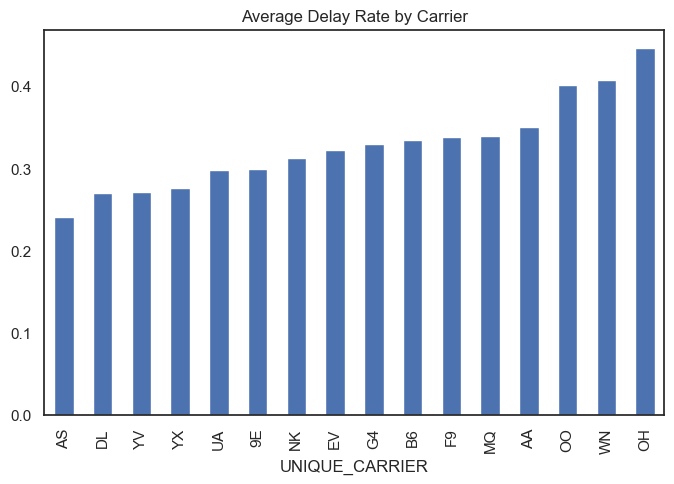

In [79]:
carrier_performance = df.groupby('UNIQUE_CARRIER')['delay_flag'].mean().sort_values()
carrier_performance.plot(kind='bar', figsize=(8, 5), title='Average Delay Rate by Carrier')
plt.grid(False)

#Analysis: It shows the carrier performance in term so f delay rates. Here it seems that AS(Alaska Airlines) is the top performer with lowest delay rate(~25%) and then DL(Delta) with ~27% delays.


5. Route Analysis for flight delay using Origin and Dest fetaures

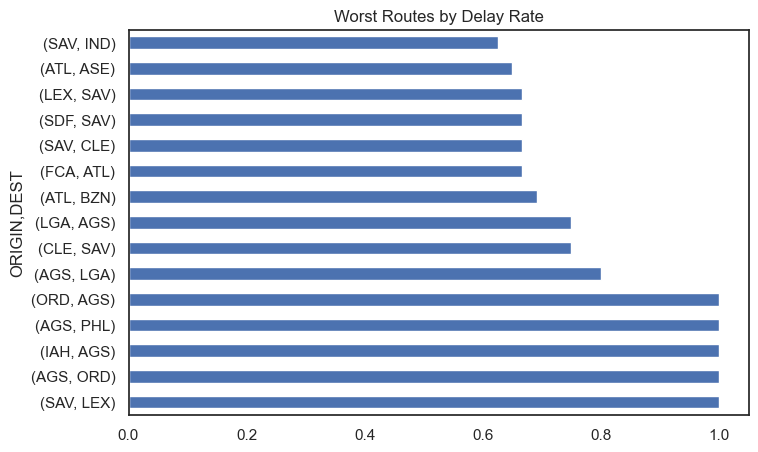

In [80]:
top_routes = df.groupby(['ORIGIN', 'DEST'])['delay_flag'].mean().sort_values(ascending=False).head(15)
top_routes.plot(kind='barh', figsize=(8, 5), title='Worst Routes by Delay Rate')
plt.grid(False)

#Analysis: It shows the worst routes with the highest delay rates: the most worst being ORD->AGS, AGS->PHL, AGS->ORD, SAV->LEX. AGS is one of the worst routes in 4 out of top 6 routes.
#  It also shows that regional to large airports would be vulnerable to delays.

6. Calendar Heatmap of daily flight delays

Text(0.5, 1.0, 'Daily Flight Delay Rate Calendar Heatmap')

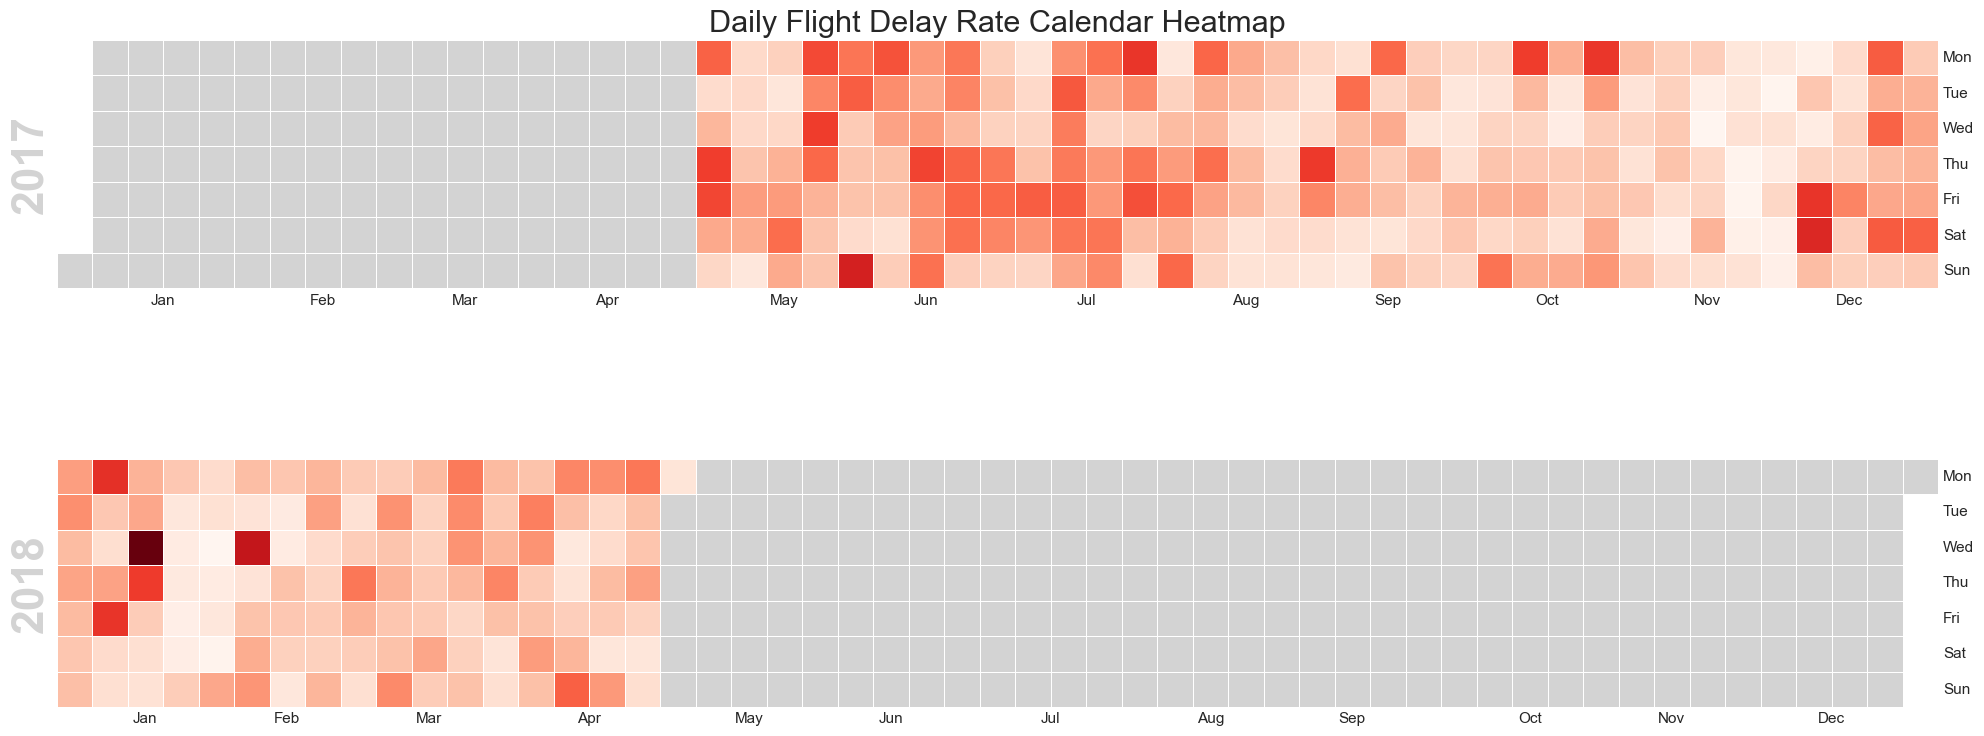

In [81]:
daily_delay = df.groupby('FL_DATE')['delay_flag'].mean()

sns.set(style="white")
fig, ax = calmap.calendarplot(
    daily_delay,
    how='mean',
    fillcolor='lightgrey',
    cmap='Reds',
    linewidth=0.5,
    fig_kws={'figsize': (20, 10)}
)
ax[0].set_title('Daily Flight Delay Rate Calendar Heatmap', fontsize=22)

#Analysis: This heatmap visualizes the proportion of delayed flights per day between May 2017 till April 2018. This calendar map shows high delay in june and july (as shown in the monthy plot). 
# There are also some spikes in January and february. It summarizes our daily and monthly plots as shown above.

7. Geographical Map for Delay Rates

In [82]:
# data preparation for the map
airport_delay = df.groupby('ORIGIN')['delay_flag'].mean().reset_index()
airport_delay.columns = ['IATA_CODE', 'delay_rate']

# Pulling data for airport and its coordinates
airports = pd.read_csv('https://raw.githubusercontent.com/jpatokal/openflights/master/data/airports.dat',
                       header=None, usecols=[4, 6, 7], names=['IATA_CODE', 'LATITUDE', 'LONGITUDE'])

# Merging the prepared data and the external data for mapping
merged = pd.merge(airport_delay, airports, on='IATA_CODE')

# Plotting the geaographical map
fig = px.scatter_geo(merged,
                     lat='LATITUDE',
                     lon='LONGITUDE',
                     hover_name='IATA_CODE',
                     size='delay_rate',
                     color='delay_rate',
                     color_continuous_scale='Reds',
                     scope='usa',
                     title='Geographical Map of Flight Delay Rate per Airport')
fig.update_layout(
    width=800,
    height=500
)
import plotly.io as pio
pio.renderers.default = 'notebook_connected'
fig.show()

#Analysis: This graph shows a spatial distribution of airports with their delay rates. This further validates our previous airports- related chart which depicted  FCA to be worst performing airport in terms of flight delay rates.

#### TASK B: DATA Modelling for Prediction

#### Data Preprocessing

A. Preprocessing the continuous numerical variables by transformation and feature Engineering (AIR_TIME, DISTANCE)

In [25]:
df.columns

Index(['QUARTER', 'MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'FL_DATE',
       'UNIQUE_CARRIER', 'ORIGIN', 'ORIGIN_CITY_NAME', 'ORIGIN_STATE_ABR',
       'DEST', 'DEST_CITY_NAME', 'DEST_STATE_ABR', 'DEP_TIME', 'ARR_TIME',
       'ARR_DELAY', 'AIR_TIME', 'DISTANCE', 'DISTANCE_GROUP', 'delay_flag'],
      dtype='object')

1. Checking distribution of continuous numerical variables using pairplot

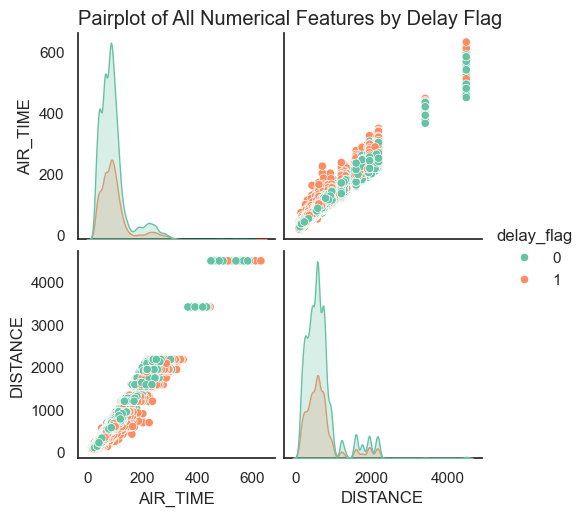

In [26]:
# Select numeric columns + target
selected_cols = ['AIR_TIME', 'DISTANCE', 'delay_flag']
pairplot_df = df[selected_cols].dropna()
sns.pairplot(pairplot_df, hue='delay_flag', diag_kind='kde', palette='Set2')
plt.suptitle('Pairplot of All Numerical Features by Delay Flag', y=1.02)
plt.show()


- The above pairplot doesn't show any any clear class separation between green and red points i.e., both on-time and delayed flights occur across all distances and air_time values
- These two variables are closely related with each other but not strong predictors of delay individually
- Also the distribution above suggests us to apply transformation (log-transformation) since the data is right skewed

In [27]:
# Applying log-transformation
df['LOG_AIR_TIME'] = np.log1p(df['AIR_TIME'])
df['LOG_DISTANCE'] = np.log1p(df['DISTANCE'])

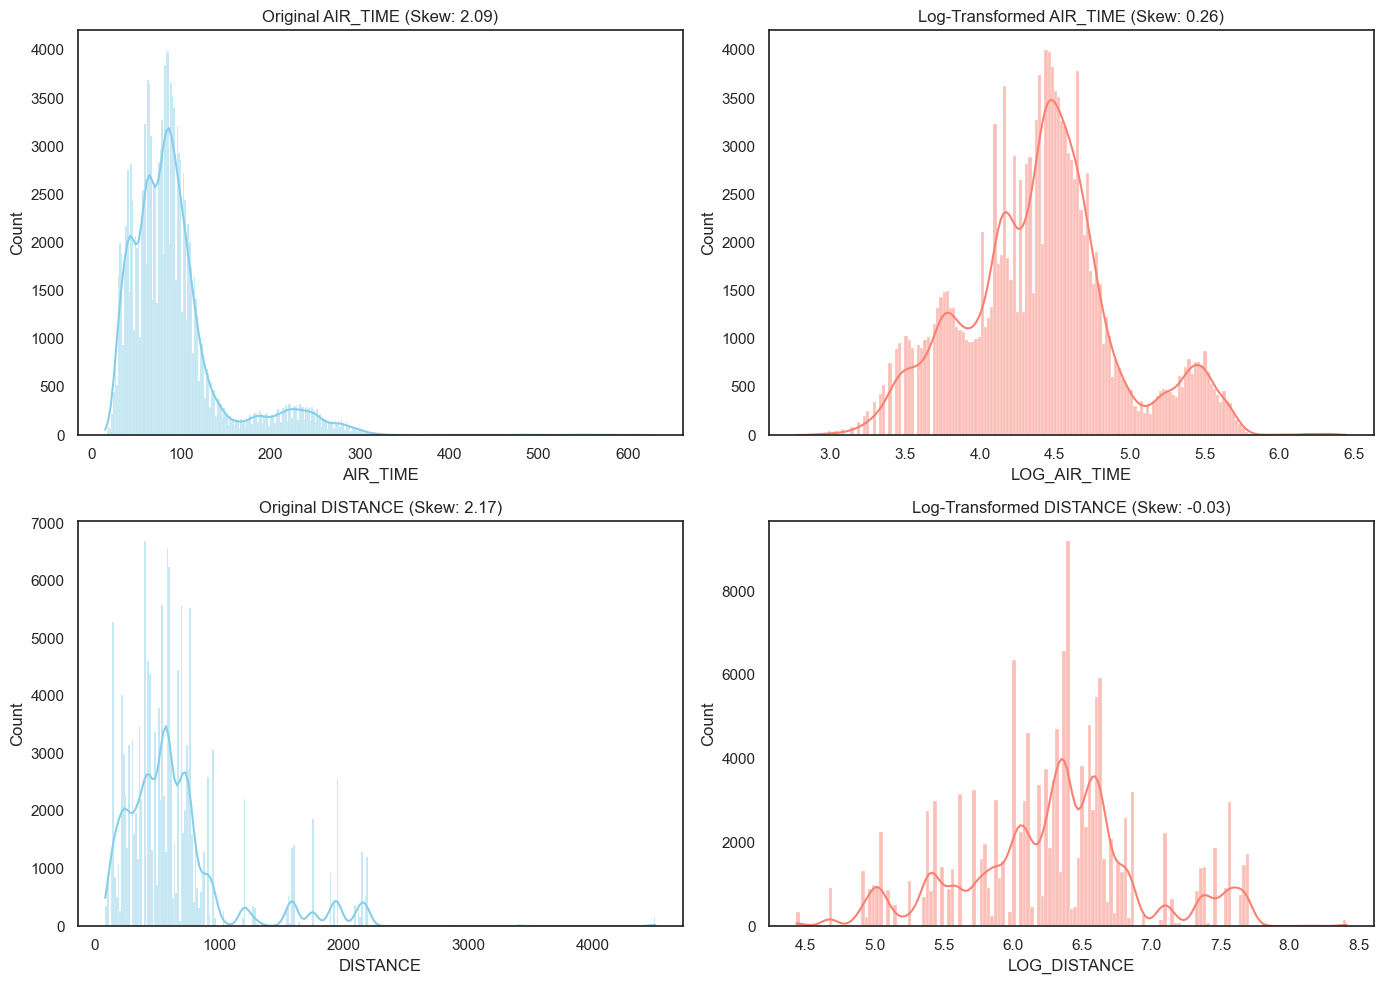

In [28]:
#Checking data distribution after transformation

from scipy.stats import skew
# Create 2x2 subplots
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# AIR_TIME
sns.histplot(df['AIR_TIME'], kde=True, ax=axs[0, 0], color='skyblue')
axs[0, 0].set_title(f'Original AIR_TIME (Skew: {skew(df["AIR_TIME"].dropna()):.2f})')

sns.histplot(df['LOG_AIR_TIME'], kde=True, ax=axs[0, 1], color='salmon')
axs[0, 1].set_title(f'Log-Transformed AIR_TIME (Skew: {skew(df["LOG_AIR_TIME"].dropna()):.2f})')

# DISTANCE
sns.histplot(df['DISTANCE'], kde=True, ax=axs[1, 0], color='skyblue')
axs[1, 0].set_title(f'Original DISTANCE (Skew: {skew(df["DISTANCE"].dropna()):.2f})')

sns.histplot(df['LOG_DISTANCE'], kde=True, ax=axs[1, 1], color='salmon')
axs[1, 1].set_title(f'Log-Transformed DISTANCE (Skew: {skew(df["LOG_DISTANCE"].dropna()):.2f})')

plt.tight_layout()
plt.show()


- After the transformation, the data is much more symmetrical, close to bell-shaped curve.
- Now the distribution is better suited for linear models

2. Running ANOVA test on the variables to evaluate the predictive power of the continuous variables with respect to delay_flag

In [29]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Example with LOG_AIR_TIME
anova_model_air = ols('LOG_AIR_TIME ~ C(delay_flag)', data=df).fit()
anova_result_air = sm.stats.anova_lm(anova_model_air, typ=2)
print("ANOVA for LOG_AIR_TIME:\n", anova_result_air)

# Example with LOG_DISTANCE
anova_model_dist = ols('LOG_DISTANCE ~ C(delay_flag)', data=df).fit()
anova_result_dist = sm.stats.anova_lm(anova_model_dist, typ=2)
print("\nANOVA for LOG_DISTANCE:\n", anova_result_dist)


ANOVA for LOG_AIR_TIME:
                      sum_sq        df           F        PR(>F)
C(delay_flag)     80.686169       1.0  311.617636  1.144117e-69
Residual       38299.422002  147916.0         NaN           NaN

ANOVA for LOG_DISTANCE:
                      sum_sq        df          F    PR(>F)
C(delay_flag)      7.594620       1.0  18.598325  0.000016
Residual       60401.450345  147916.0        NaN       NaN


For LOG_AIR_TIME:
- The ANOVA test depicts that both the variables are statistically significant meaning that there is a significant difference in the mean LOG_AIR_TIME between delayed and on-time flights
- F-statistic is also very high which shows strong effect size
- Hence it should be retained in the model and is useful for predicting delays

For LOG_DISTANCE: 
- The anova test for this variable is also statistically significant but with a smaller effect size than LOG_AIR_TIME
- Hence, retaining this feature in the model to improve performance


B. Preprocessing the cyclical numerical variables ('DEP_TIME', 'ARR_TIME','DAY_OF_WEEK','MONTH','QUARTER','DAY_OF_MONTH')

In [30]:
def time_to_hour_decimal(hhmm):
    """
    Converts hhmm integer format to fractional hour
    """
    hh = hhmm // 100
    mm = hhmm % 100
    return hh + mm / 60.0

def smart_cyclical_encode(df):
    """
    Applies cyclical encoding to date/time-based features 
    Includes fractional hour conversion for DEP_TIME and ARR_TIME (time_to_hour_decimal function)
    """
    df = df.copy()

    # Add all cyclical columns
    cyclical_cols = {
        'DAY_OF_WEEK': 7,
        'MONTH': 12,
        'QUARTER': 4,
        'DAY_OF_MONTH': 31
    }

    # Encode regular cyclic features
    for col, max_val in cyclical_cols.items():
        if col in df.columns:
            unique_vals = df[col].nunique()
            if unique_vals / max_val >= 0.8:
                df[f'{col}_sin'] = np.sin(2 * np.pi * df[col] / max_val)
                df[f'{col}_cos'] = np.cos(2 * np.pi * df[col] / max_val)
            else:
                print(f"⚠️ Skipping '{col}' – only {unique_vals}/{max_val} values present.")

    # Handle time-based features with hhmm format
    for time_col in ['DEP_TIME', 'ARR_TIME']:
        if time_col in df.columns:
            decimal_col = f'{time_col}_DECIMAL'
            df[decimal_col] = df[time_col].apply(time_to_hour_decimal)
            df[f'{time_col}_sin'] = np.sin(2 * np.pi * df[decimal_col] / 24)
            df[f'{time_col}_cos'] = np.cos(2 * np.pi * df[decimal_col] / 24)

    return df


In [31]:
df_encoded = smart_cyclical_encode(df)
df_encoded.columns


Index(['QUARTER', 'MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'FL_DATE',
       'UNIQUE_CARRIER', 'ORIGIN', 'ORIGIN_CITY_NAME', 'ORIGIN_STATE_ABR',
       'DEST', 'DEST_CITY_NAME', 'DEST_STATE_ABR', 'DEP_TIME', 'ARR_TIME',
       'ARR_DELAY', 'AIR_TIME', 'DISTANCE', 'DISTANCE_GROUP', 'delay_flag',
       'LOG_AIR_TIME', 'LOG_DISTANCE', 'DAY_OF_WEEK_sin', 'DAY_OF_WEEK_cos',
       'MONTH_sin', 'MONTH_cos', 'QUARTER_sin', 'QUARTER_cos',
       'DAY_OF_MONTH_sin', 'DAY_OF_MONTH_cos', 'DEP_TIME_DECIMAL',
       'DEP_TIME_sin', 'DEP_TIME_cos', 'ARR_TIME_DECIMAL', 'ARR_TIME_sin',
       'ARR_TIME_cos'],
      dtype='object')

In [32]:
# Dropping variables to avoid data leakage and additional features
cols_to_drop = [
    'DAY_OF_WEEK', 'MONTH', 'QUARTER', 'DAY_OF_MONTH','AIR_TIME', 'DISTANCE',
    'DEP_TIME', 'ARR_TIME', 'FL_DATE', 'YEAR', 'ARR_DELAY', 'DEP_TIME_DECIMAL', 'ARR_TIME_DECIMAL'
    ]
df_encoded.drop(columns=[col for col in cols_to_drop if col in df.columns], inplace=True)
df_encoded.columns

Index(['UNIQUE_CARRIER', 'ORIGIN', 'ORIGIN_CITY_NAME', 'ORIGIN_STATE_ABR',
       'DEST', 'DEST_CITY_NAME', 'DEST_STATE_ABR', 'DISTANCE_GROUP',
       'delay_flag', 'LOG_AIR_TIME', 'LOG_DISTANCE', 'DAY_OF_WEEK_sin',
       'DAY_OF_WEEK_cos', 'MONTH_sin', 'MONTH_cos', 'QUARTER_sin',
       'QUARTER_cos', 'DAY_OF_MONTH_sin', 'DAY_OF_MONTH_cos',
       'DEP_TIME_DECIMAL', 'DEP_TIME_sin', 'DEP_TIME_cos', 'ARR_TIME_DECIMAL',
       'ARR_TIME_sin', 'ARR_TIME_cos'],
      dtype='object')

In [33]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 147918 entries, 0 to 148051
Data columns (total 25 columns):
 #   Column            Non-Null Count   Dtype   
---  ------            --------------   -----   
 0   UNIQUE_CARRIER    147918 non-null  object  
 1   ORIGIN            147918 non-null  object  
 2   ORIGIN_CITY_NAME  147918 non-null  object  
 3   ORIGIN_STATE_ABR  147918 non-null  object  
 4   DEST              147918 non-null  object  
 5   DEST_CITY_NAME    147918 non-null  object  
 6   DEST_STATE_ABR    147918 non-null  object  
 7   DISTANCE_GROUP    147918 non-null  category
 8   delay_flag        147918 non-null  int64   
 9   LOG_AIR_TIME      147918 non-null  float64 
 10  LOG_DISTANCE      147918 non-null  float64 
 11  DAY_OF_WEEK_sin   147918 non-null  float64 
 12  DAY_OF_WEEK_cos   147918 non-null  float64 
 13  MONTH_sin         147918 non-null  float64 
 14  MONTH_cos         147918 non-null  float64 
 15  QUARTER_sin       147918 non-null  float64 
 16  QUARTER

In [34]:
df_encoded.head()

,UNIQUE_CARRIER,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,DEST,DEST_CITY_NAME,DEST_STATE_ABR,DISTANCE_GROUP,delay_flag,LOG_AIR_TIME,...,QUARTER_sin,QUARTER_cos,DAY_OF_MONTH_sin,DAY_OF_MONTH_cos,DEP_TIME_DECIMAL,DEP_TIME_sin,DEP_TIME_cos,ARR_TIME_DECIMAL,ARR_TIME_sin,ARR_TIME_cos
0,DL,LIT,"Little Rock, AR",AR,ATL,"Atlanta, GA",GA,2,0,4.174387,...,-1.000000e+00,-1.836970e-16,0.790776,-0.612106,5.633333,0.995396,0.095846,7.950000,0.872496,-0.488621
1,DL,BOS,"Boston, MA",MA,ATL,"Atlanta, GA",GA,4,0,4.852030,...,1.000000e+00,6.123234e-17,0.299363,-0.954139,18.483333,-0.992005,0.126199,21.133333,-0.681998,0.731354
2,WN,ATL,"Atlanta, GA",GA,DAL,"Dallas, TX",TX,3,0,4.672829,...,-2.449294e-16,1.000000e+00,0.651372,-0.758758,13.750000,-0.442289,-0.896873,14.850000,-0.678801,-0.734323
3,EV,ATL,"Atlanta, GA",GA,HPN,"White Plains, NY",NY,4,0,4.736198,...,-1.000000e+00,-1.836970e-16,-0.968077,-0.250653,11.966667,0.008727,-0.999962,14.133333,-0.529919,-0.848048
4,DL,MSY,"New Orleans, LA",LA,ATL,"Atlanta, GA",GA,2,0,4.094345,...,1.000000e+00,6.123234e-17,0.394356,0.918958,5.366667,0.986286,0.165048,7.616667,0.911762,-0.410719


C. Data Splitting and Encoding the categorical variables

In [35]:
cols_to_drop = ['ORIGIN_CITY_NAME', 'DEST_CITY_NAME']
df_encoded.drop(columns=cols_to_drop, inplace=True)


In [36]:
df_encoded.DISTANCE_GROUP.value_counts()

DISTANCE_GROUP
3     53722
2     39418
1     18943
4     18845
7      5578
9      3907
8      3898
5      2632
6       790
11      185
Name: count, dtype: int64

In [37]:
# Importing all the libraries for data preprocessing
from sklearn.model_selection import train_test_split
import category_encoders as ce

In [38]:

def preprocess_encode_data(df, target_col='delay_flag', test_size=0.2, random_state=42):
    """
    Preprocess flight data by:
    a. Splitting into train/test sets
    b. Target encoding key categorical columns
    c. One-hot encoding DISTANCE_GROUP

    Returns:
        X_train, X_test, y_train, y_test
    """

    # 1. Split features and target
    X = df.drop(columns=[target_col])
    y = df[target_col]

    # 2. Train-test split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, stratify=y, random_state=random_state
    )

    # 3. Target encode selected categorical columns
    target_encode_cols = ['UNIQUE_CARRIER', 'ORIGIN', 'DEST', 'ORIGIN_STATE_ABR', 'DEST_STATE_ABR']
    encoder = ce.TargetEncoder(cols=target_encode_cols)
    X_train[target_encode_cols] = encoder.fit_transform(X_train[target_encode_cols], y_train)
    X_test[target_encode_cols] = encoder.transform(X_test[target_encode_cols])

    # 4. One-hot encode DISTANCE_GROUP if present
    if 'DISTANCE_GROUP' in X_train.columns:
        all_df = pd.concat([X_train, X_test], axis=0)
        all_df = pd.get_dummies(all_df, columns=['DISTANCE_GROUP'], drop_first=True, dtype=int)

        # Split back into train and test
        X_train = all_df.iloc[:len(X_train), :].copy()
        # print(X_train.filter(like="DISTANCE_GROUP").head())

        X_test = all_df.iloc[len(X_train):, :].copy()

    return X_train, X_test, y_train, y_test


In [39]:
X_train, X_test, y_train, y_test = preprocess_encode_data(df_encoded, target_col='delay_flag')

In [40]:
X_train.head()

,UNIQUE_CARRIER,ORIGIN,ORIGIN_STATE_ABR,DEST,DEST_STATE_ABR,LOG_AIR_TIME,LOG_DISTANCE,DAY_OF_WEEK_sin,DAY_OF_WEEK_cos,MONTH_sin,...,ARR_TIME_cos,DISTANCE_GROUP_2,DISTANCE_GROUP_3,DISTANCE_GROUP_4,DISTANCE_GROUP_5,DISTANCE_GROUP_6,DISTANCE_GROUP_7,DISTANCE_GROUP_8,DISTANCE_GROUP_9,DISTANCE_GROUP_11
19099,0.269228,0.256262,0.312414,0.287085,0.288543,4.770685,6.774224,0.974928,-0.222521,1.224647e-16,...,-0.619094,0,0,1,0,0,0,0,0,0
78492,0.269228,0.203753,0.251034,0.287085,0.288543,4.025352,5.834811,0.781831,0.623490,5.000000e-01,...,-0.728371,1,0,0,0,0,0,0,0,0
65384,0.269228,0.315821,0.315700,0.338951,0.329193,5.459586,7.370231,-0.781831,0.623490,-2.449294e-16,...,-0.942641,0,0,0,0,0,1,0,0,0
110338,0.402203,0.315821,0.315700,0.358491,0.334288,3.295837,4.672829,0.974928,-0.222521,8.660254e-01,...,-0.716302,0,0,0,0,0,0,0,0,0
129455,0.306003,0.236364,0.258373,0.287085,0.288543,3.663562,5.429346,0.433884,-0.900969,1.000000e+00,...,-0.930418,0,0,0,0,0,0,0,0,0


D. Running Random Forest and its feature importance for feature engineering 

             Feature  Importance
18  ARR_TIME_DECIMAL    0.082026
20      ARR_TIME_cos    0.080344
19      ARR_TIME_sin    0.078839
5       LOG_AIR_TIME    0.076042
15  DEP_TIME_DECIMAL    0.073046
16      DEP_TIME_sin    0.071700
17      DEP_TIME_cos    0.071381
6       LOG_DISTANCE    0.056260
13  DAY_OF_MONTH_sin    0.054445
14  DAY_OF_MONTH_cos    0.043421


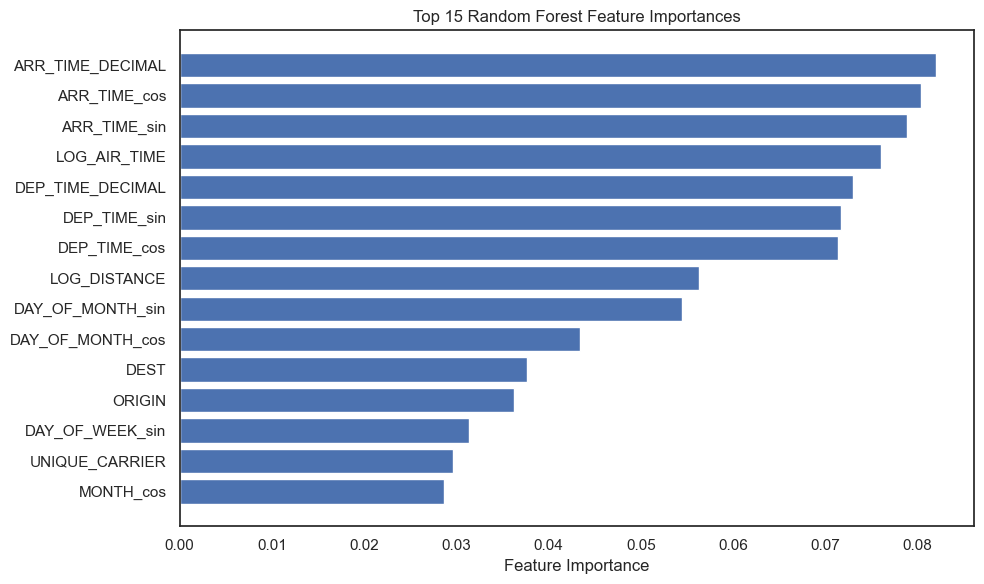

In [41]:
from sklearn.ensemble import RandomForestClassifier
# Train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Get feature importances
importances = rf_model.feature_importances_
features = X_train.columns

# Create a DataFrame for visualization
feat_imp_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feat_imp_df = feat_imp_df.sort_values(by='Importance', ascending=False)

# Display or return top N if needed
print(feat_imp_df.head(10))  # Top 10 features

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feat_imp_df['Feature'][:15][::-1], feat_imp_df['Importance'][:15][::-1])
plt.xlabel("Feature Importance")
plt.title("Top 15 Random Forest Feature Importances")
plt.tight_layout()
plt.show()

Creating a new feature based on feature improtance of Random Forest Model

In [42]:
X_train['LOG_SPEED'] = X_train['LOG_DISTANCE'] - X_train['LOG_AIR_TIME']
X_test['LOG_SPEED'] = X_test['LOG_DISTANCE'] - X_test['LOG_AIR_TIME']

In [43]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [45]:
pip install lightgbm

   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 1.5/1.5 MB 15.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [47]:
pip install catboost

   ---------------------------------------- 0.0/102.4 MB ? eta -:--:--
   - -------------------------------------- 2.9/102.4 MB 21.0 MB/s eta 0:00:05
   -- ------------------------------------- 6.8/102.4 MB 20.0 MB/s eta 0:00:05
   --- ------------------------------------ 10.0/102.4 MB 17.3 MB/s eta 0:00:06
   ---- ----------------------------------- 11.5/102.4 MB 15.0 MB/s eta 0:00:07
   ----- ---------------------------------- 13.4/102.4 MB 13.5 MB/s eta 0:00:07
   ----- ---------------------------------- 15.2/102.4 MB 12.6 MB/s eta 0:00:07
   ------ --------------------------------- 16.5/102.4 MB 11.7 MB/s eta 0:00:08
   ------ --------------------------------- 17.8/102.4 MB 10.9 MB/s eta 0:00:08
   ------- -------------------------------- 18.6/102.4 MB 10.3 MB/s eta 0:00:09
   ------- -------------------------------- 19.4/102.4 MB 9.6 MB/s eta 0:00:09
   ------- -------------------------------- 20.2/102.4 MB 9.1 MB/s eta 0:00:10
   -------- ------------------------------- 21.2/102.


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [48]:
# Importing all the necessary libraries for modelling and evaluation
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score
from sklearn.model_selection import GridSearchCV
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

In [49]:

def train_and_evaluate_models(X_train, X_test, y_train, y_test):
    """
    Trains and evaluates Logistic Regression, LightGBM, CatBoost, and XGBoost models.
    Prints performance metrics for each.
    """
    pos_weight = round(y_train.value_counts()[0] / y_train.value_counts()[1], 2)

    models = {
        "Logistic Regression": LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42),
        "LightGBM": LGBMClassifier(scale_pos_weight=pos_weight, random_state=42),
        "CatBoost": CatBoostClassifier(verbose=0, scale_pos_weight=pos_weight, random_state=42),
        "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', scale_pos_weight=pos_weight, random_state=42)
    }

    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_proba = model.predict_proba(X_test)[:, 1]

        print(f"\nModel Name: {name}")
        print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
        print("ROC AUC Score:", round(roc_auc_score(y_test, y_proba), 4))
        print("Accuracy:", round(accuracy_score(y_test, y_pred), 4))
        print("Classification Report:\n", classification_report(y_test, y_pred))


In [50]:
train_and_evaluate_models(X_train, X_test, y_train, y_test)


Model Name: Logistic Regression
Confusion Matrix:
 [[13051  7597]
 [ 3513  5423]]
ROC AUC Score: 0.6657
Accuracy: 0.6245
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.63      0.70     20648
           1       0.42      0.61      0.49      8936

    accuracy                           0.62     29584
   macro avg       0.60      0.62      0.60     29584
weighted avg       0.68      0.62      0.64     29584

[LightGBM] [Info] Number of positive: 35742, number of negative: 82592
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009595 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2776
[LightGBM] [Info] Number of data points in the train set: 118334, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.302043 -> initscore=-0.837586
[LightGBM] [Info] Start training from score -0.837586

Model Name: LightGBM
Confusion 

c:\Users\iamsh\Python\Lib\site-packages\xgboost\training.py:183: UserWarning:

[03:19:50] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.





Model Name: XGBoost
Confusion Matrix:
 [[16027  4621]
 [ 2786  6150]]
ROC AUC Score: 0.8078
Accuracy: 0.7496
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.78      0.81     20648
           1       0.57      0.69      0.62      8936

    accuracy                           0.75     29584
   macro avg       0.71      0.73      0.72     29584
weighted avg       0.77      0.75      0.76     29584



MODEL RESULTS:
- Objective: proactively inform users about likelihood of flight delays to make better booking choices
- Metrics to focus on:
a. High Recall: catch most of the flights which are likely to be delayed 
b. Good Precision: avoid marking on-time flights as delayed
- Logitic Regression: Good recall(0.61) but low precision which may falsely create warnings. Weakest among all.
- LightGBM: significant boost over Logistic Regression with better recall(0.66) and better accuracy
- CatBoost: Best overall performance with (0.67) recall and high AUC(0.81) to strongly rank positive class
- XGBoost: Nearly identical to CatBoost; Best recall(0.69) compared to others, balanced precision(0.57), F1-score(0.62) which is a good trade-off between precision and recall

To further improve performance, Hyperparameter tuning using RandomSearch instead of GridSearch CV to run it faster.

In [55]:
from sklearn.model_selection import RandomizedSearchCV

def random_search_and_evaluate_all(X_train, X_test, y_train, y_test, n_iter=30):
    """
    RandomizedSearchCV and evaluation for Logistic Regression, LightGBM, CatBoost, and XGBoost
    """
    best_models = {}
    pos_weight = round(y_train.value_counts()[0] / y_train.value_counts()[1], 2)

    # a. Logistic Regression
    print("\nRandomized Search: Logistic Regression...\n")
    lr_param_dist = {
        'C': np.logspace(-3, 2, 10),
        'penalty': ['l2'],
        'solver': ['lbfgs']
    }

    lr = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
    lr_rand = RandomizedSearchCV(lr, lr_param_dist, n_iter=n_iter, scoring='roc_auc',
                                 cv=5, n_jobs=-1, verbose=2, random_state=42)
    lr_rand.fit(X_train, y_train)
    best_models['Logistic Regression'] = lr_rand.best_estimator_

    # b. LightGBM
    print("\nRandomized Search: LightGBM...\n")
    lgb_param_dist = {
        'n_estimators': [100, 300, 500],
        'max_depth': [3, 6, 10],
        'learning_rate': [0.01, 0.05, 0.1],
        'subsample': [0.7, 0.8, 1.0],
        'colsample_bytree': [0.7, 0.8, 1.0],
        'reg_alpha': [0, 1],
        'reg_lambda': [0, 1]
    }

    lgb = LGBMClassifier(scale_pos_weight=pos_weight, random_state=42)
    lgb_rand = RandomizedSearchCV(lgb, lgb_param_dist, n_iter=n_iter, scoring='roc_auc',
                                  cv=5, n_jobs=-1, verbose=2, random_state=42)
    lgb_rand.fit(X_train, y_train)
    best_models['LightGBM'] = lgb_rand.best_estimator_

    # c. CatBoost
    print("\nRandomized Search: CatBoost...\n")
    cat_param_dist = {
        'iterations': [100, 300],
        'depth': [4, 6, 8, 10],
        'learning_rate': [0.01, 0.05, 0.1],
        'l2_leaf_reg': [1, 3, 5],
        'border_count': [32, 64, 128]
    }

    cat = CatBoostClassifier(scale_pos_weight=pos_weight, verbose=0, random_state=42)
    cat_rand = RandomizedSearchCV(cat, cat_param_dist, n_iter=n_iter, scoring='roc_auc',
                                  cv=5, n_jobs=-1, verbose=2, random_state=42)
    cat_rand.fit(X_train, y_train)
    best_models['CatBoost'] = cat_rand.best_estimator_

    # d. XGBoost
    print("\nRandomized Search: XGBoost...\n")
    xgb_param_dist = {
        'n_estimators': [100, 300],
        'max_depth': [3, 6, 10],
        'learning_rate': [0.01, 0.05, 0.1],
        'subsample': [0.7, 0.8, 1.0],
        'colsample_bytree': [0.7, 0.8, 1.0],
        'reg_alpha': [0, 0.5, 1],
        'reg_lambda': [0, 0.5, 1]
    }

    xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss',
                        scale_pos_weight=pos_weight, random_state=42)
    xgb_rand = RandomizedSearchCV(xgb, xgb_param_dist, n_iter=n_iter, scoring='roc_auc',
                                  cv=5, n_jobs=-1, verbose=2, random_state=42)
    xgb_rand.fit(X_train, y_train)
    best_models['XGBoost'] = xgb_rand.best_estimator_

    # Evaluation
    for name, model in best_models.items():
        print(f"\nEvaluation: {name}")
        y_pred = model.predict(X_test)
        y_proba = model.predict_proba(X_test)[:, 1]
        print("Accuracy:", round(accuracy_score(y_test, y_pred), 4))
        print("ROC AUC Score:", round(roc_auc_score(y_test, y_proba), 4))
        print("Classification Report:\n", classification_report(y_test, y_pred))

    return best_models


In [56]:
best_models = random_search_and_evaluate_all(X_train, X_test, y_train, y_test, n_iter=30)



Randomized Search: Logistic Regression...

Fitting 5 folds for each of 10 candidates, totalling 50 fits


c:\Users\iamsh\Python\Lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning:

The total space of parameters 10 is smaller than n_iter=30. Running 10 iterations. For exhaustive searches, use GridSearchCV.




Randomized Search: LightGBM...

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[LightGBM] [Info] Number of positive: 35742, number of negative: 82592
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002514 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2776
[LightGBM] [Info] Number of data points in the train set: 118334, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.302043 -> initscore=-0.837586
[LightGBM] [Info] Start training from score -0.837586

Randomized Search: CatBoost...

Fitting 5 folds for each of 30 candidates, totalling 150 fits

Randomized Search: XGBoost...

Fitting 5 folds for each of 30 candidates, totalling 150 fits


c:\Users\iamsh\Python\Lib\site-packages\xgboost\training.py:183: UserWarning:

[05:11:25] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.





Evaluation: Logistic Regression
Accuracy: 0.6248
ROC AUC Score: 0.6657
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.63      0.70     20648
           1       0.42      0.61      0.49      8936

    accuracy                           0.62     29584
   macro avg       0.60      0.62      0.60     29584
weighted avg       0.68      0.62      0.64     29584


Evaluation: LightGBM
Accuracy: 0.7576
ROC AUC Score: 0.8197
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.79      0.82     20648
           1       0.58      0.69      0.63      8936

    accuracy                           0.76     29584
   macro avg       0.72      0.74      0.73     29584
weighted avg       0.77      0.76      0.76     29584


Evaluation: CatBoost
Accuracy: 0.7353
ROC AUC Score: 0.7914
Classification Report:
               precision    recall  f1-score   support

           0       0.84  

Analysis of RandomSearch: 
- XGBoost gained the most: from 0.7496 ti 0.794 accuracy, and F1 improved from 0.62 to 0.67

- LightGBM made strong gains too (F1 0.58 to 0.63)

- CatBoost slightly dropped in accuracy and AUC, but still decent

- Logistic Regression did not improve, because param grid was small

Conclusion:

Use XGBoost as champion model which is now giving the best recall, precision and AUC. To further interpret the model, plotting feature importance and SHAP.

Understanding Feature Importance of top 15 features of the models

In [70]:
def plot_feature_importance(model, feature_names, model_name='Model', top_n=15):
    """
    Plots top 15 feature importances for XGBoost and Catboost
    
    """
    importances = model.feature_importances_
    feat_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importances
    })
    
    # Sort and pick top N
    feat_df = feat_df.sort_values(by='Importance', ascending=False).head(top_n)
    
    # Plot
    plt.figure(figsize=(10, 6))
    plt.barh(feat_df['Feature'][::-1], feat_df['Importance'][::-1])
    plt.title(f"Top {top_n} Feature Importances: {model_name}")
    plt.xlabel("Importance Score")
    plt.tight_layout()
    plt.show()

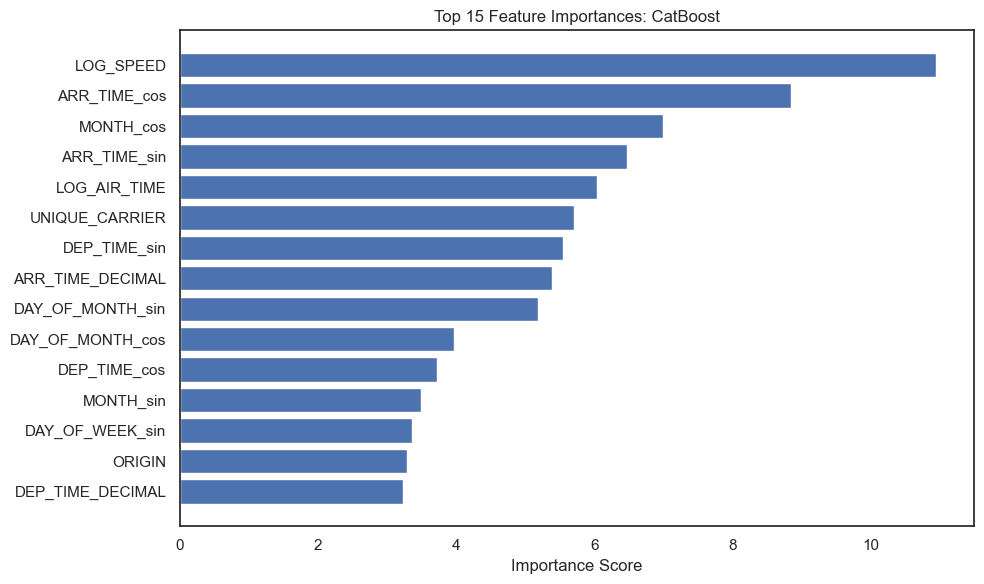

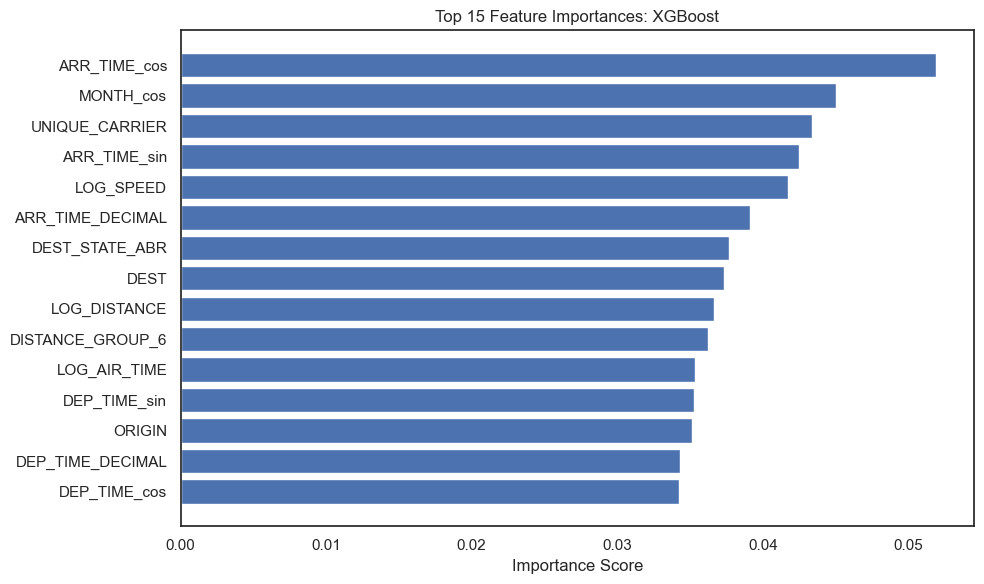

In [ ]:
# Feature names
features = X_train.columns

# XGBoost
plot_feature_importance(best_models['CatBoost'], features, model_name='CatBoost')
# XGBoost
plot_feature_importance(best_models['XGBoost'], features, model_name='XGBoost')

Feature Importance Interpretation: to undersatd information gain from features

- LOG_SPEED: new feature from RF feature importance graph helped add actual value; is among the top 5 predictor in both the models
- Time related cyclical-form features (ARR_TIME_cos, MONTH_cos, ARR_TIME_sin) are dominant. They are consistently high across both the models. This reflects peak-time congestion, airport time limitations, etc
- UIQUE_CARRIER is also a top feature in both of them suggesting there may be operational inefficiencies
- Distance related features played a secondary role. They are helpful but not the strongest as suggested by the ANOVA test as well

Conclusively, flight delays are most strongly driven by time-of-day effects, airline/operator characteristics, and the speed-based feature.

SHAP Interpretation of features to understand the direction as well as impact of the features in overall prediction

In [65]:
pip install shap


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [66]:
import shap
explainer = shap.TreeExplainer(best_models['XGBoost'])
shap_values = explainer.shap_values(X_test)

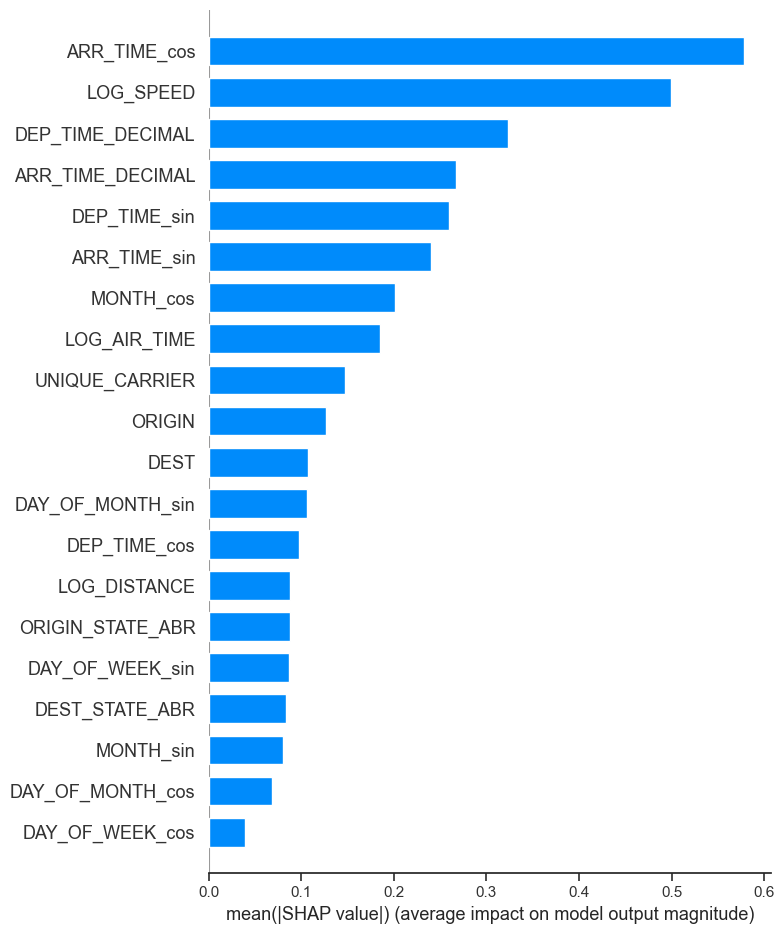

In [ ]:
# Bar plot - Global feature Importance
# Mean absolute SHAP value per feature = average impact on the model's output across all predictions which drives the model's accuracy
shap.summary_plot(shap_values, X_test, plot_type='bar')


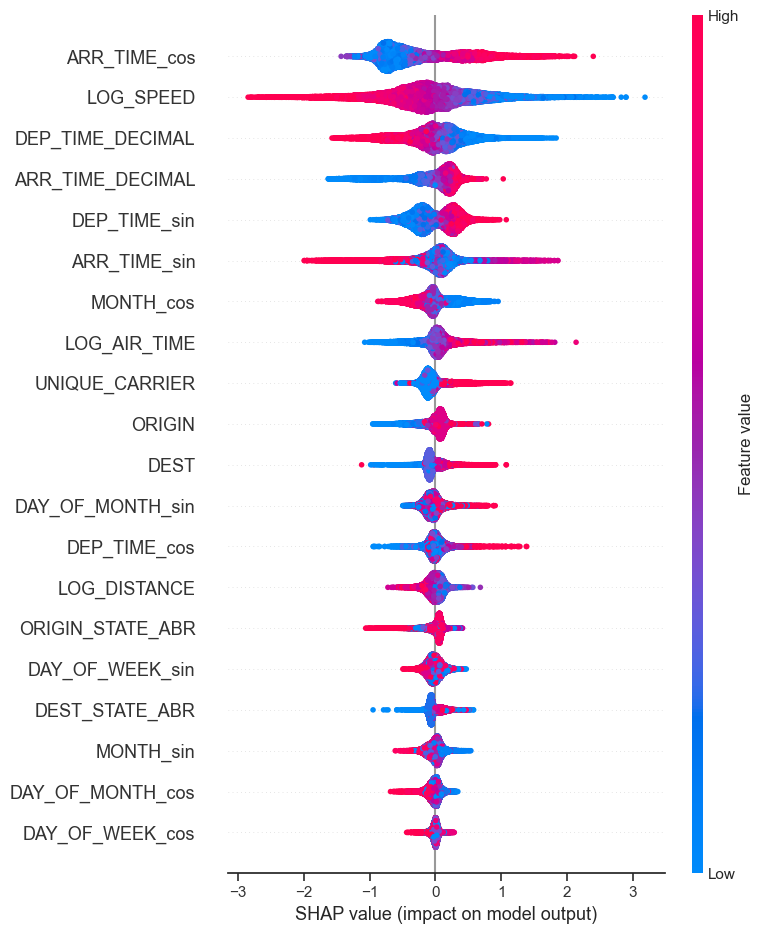

In [ ]:
# Beeswarm plot for Gobal feature impact and its direction
shap.summary_plot(shap_values, X_test)


Explanation:
- ARR_TIME_cos:	Low values (night or early morning) decrease delay risk; high values (afternoon/evening) increase it
- LOG_SPEED:	High speed (red) reduces predicted delay, low speed (blue) increases it.
- DEP_TIME_DECIMAL:	Higher departure time leads slightly higher delay risk.

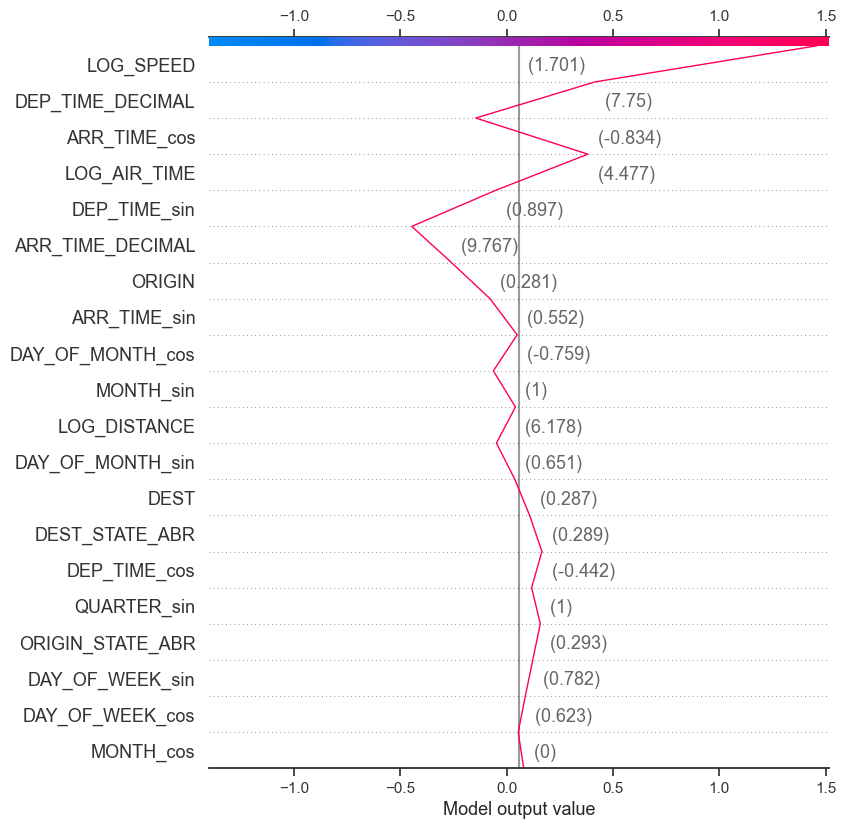

In [ ]:
# Decision Plot: to understand how all features collectively contribute to Local Explanation for one prediction( which is 10 for me)
i = 10  
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[i], X_test.iloc[i])

shap.decision_plot(explainer.expected_value, shap_values[i], X_test.iloc[i])


Explanation:
- LOG_SPEED	(+1.70):This flight was fast, increasing likelihood of not delayed
- DEP_TIME_DECIMAL	(+7.75):Late departure time increased delay likelihood
- ARR_TIME_cos	(−0.83):Arriving at a low-risk time helped avoid delay
- ARR_TIME_DECIMAL	(+9.76):A strong positive contribution thus likely predicted as delayed